# Week 3 Network Dynamics

In [ ]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
%pip install google-api-python-client
from googleapiclient.discovery import build
from datetime import datetime

BASE_PATH = '/content/drive/MyDrive/WebScience/week3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def save_graph(fileName):
  plt.savefig('/content/drive/MyDrive/WebScience/week3/' + fileName + '.png')

In [ ]:
import random

def get_song():
  with open('/content/drive/MyDrive/WebScience/week3/youtube_top100/20151109_1800_data.json', 'r') as file:
    data = json.load(file)

  chosen = random.choice(data)
  return chosen['id'], chosen['snippet']['title']

print(get_song())

('t2NgsJrrAyM', 'Sia - Alive')


## 1. Cascading effects

In [ ]:
def likes_diff_from_dir(dir, x_labels=False, keyed='id'):
  files = os.listdir('/content/drive/MyDrive/WebScience/week3/' + dir)
  files.sort(key=lambda val: int(val[:8]))
  song_order = {}

  songs = {}
  for fi, filename in enumerate(files):
    with open(f'/content/drive/MyDrive/WebScience/week3/{dir}/{filename}', "r") as file:
      data = json.load(file)
      for i, song in enumerate(data):
        if fi == 0:
          song_order[song['id']] = i

        if song['id'] not in songs:
          songs[song['id']] = {'likes': [], 'dislikes': [], 'diff': [], 'name' : song['snippet']['title']}

        songs[song['id']]['likes'].append(int(song['statistics']['likeCount']))
        songs[song['id']]['dislikes'].append(int(song['statistics']['dislikeCount']))
        songs[song['id']]['diff'].append(int(song['statistics']['likeCount']) - int(song['statistics']['dislikeCount']))

  if keyed == 'order':
    songs = {song_order[id]: data for id, data in songs.items()}

  if not x_labels:
    return songs

  x = [f'{name[6:8]}/{name[4:6]}/{name[2:4]}' for name in files]
  return songs, x


In [ ]:
# a. Likes and dislikes youtube dataset
yt_songs, yt_x = likes_diff_from_dir('youtube_top100', True)


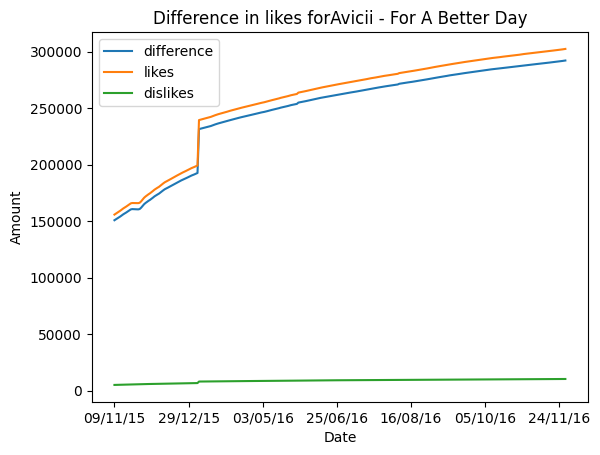

In [ ]:
id = get_song()[0]
plt.plot(yt_x, yt_songs[id]['diff'], label='difference')
plt.plot(yt_x, yt_songs[id]['likes'], label='likes')
plt.plot(yt_x, yt_songs[id]['dislikes'], label='dislikes')
plt.xticks(np.arange(0, len(yt_x), 50.0))
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title('Difference in likes for' + yt_songs[id]['name'])
plt.legend()
save_graph('diff_' + yt_songs[id]['name'])
plt.legend()
plt.show()

# for id, diff in songs.items():
#   if any(n<0 for n in diff):
#     print(id)

In [ ]:
# b. Likes and dislikes megahit and alarmschijf songs

In [ ]:
mh_songs, mh_x = likes_diff_from_dir('alarmschijf', True)

NameError: ignored

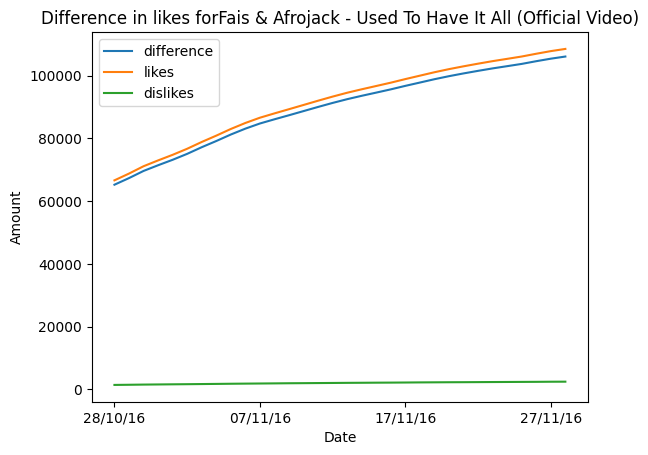

In [ ]:
# alarmschijf: u7s3YJzq8XY / megahit: vn-6fiVkAcA
id = 'u7s3YJzq8XY'
plt.plot(mh_x, mh_songs[id]['diff'], label='difference')
plt.plot(mh_x, mh_songs[id]['likes'], label='likes')
plt.plot(mh_x, mh_songs[id]['dislikes'], label='dislikes')
plt.xticks(np.arange(0, len(mh_x), 10.0))
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title('Difference in likes for' + mh_songs[id]['name'])
plt.legend()
save_graph('diff_' + mh_songs[id]['name'])

plt.show()

## 2. Network effects

In [ ]:
# a. View count over time youtube dataset
def views(dir, x_labels=False):
  files = os.listdir('/' + dir)
  files.sort(key=lambda val: int(val[:8]))

  songs = {}
  for filename in files:
    with open(f'/{dir}/{filename}', "r") as file:
      data = json.load(file)
      for song in data:
        if song['id'] not in songs:
          songs[song['id']] = {'views' : [], 'Name' : song['snippet']['title']}

        songs[song['id']]['views'].append(int(song['statistics']['viewCount']))
  if not x_labels:
    return songs

  x = [f'{name[6:8]}/{name[4:6]}/{name[2:4]}' for name in files]
  return songs, x


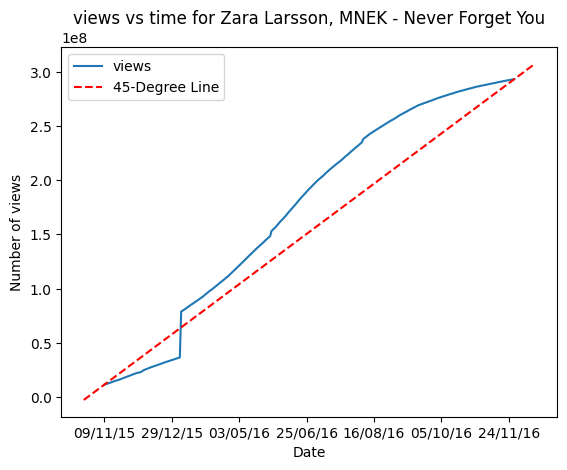

In [ ]:
yt_songs, yt_x = views('content/drive/MyDrive/WebScience/week3/youtube_top100', True)
id = 'GTyN-DB_v5M'
yt_song = yt_songs[id]
yt_song_difference = []
for i in range(len(yt_song['views'])):
  if i == 0:
    yt_song_difference.append(yt_song['views'][0])
  else:
    yt_song_difference.append(yt_song['views'][i] - yt_song['views'][i - 1])


plt.plot(yt_x, yt_song['views'], label='views')
plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], label='45-Degree Line', linestyle='--', color='red')
plt.xticks(np.arange(0, len(yt_x), 50.0))
plt.xlabel("Date")
plt.ylabel("Number of views")
plt.title('views vs time for ' + yt_song['Name'])
#plt.axline([yt_x[0], yt_songs[id]['views'][0]], [10, 21000000])
plt.legend()

plt.show()


## 3. Rich-Get-Richer (Popularity) Effects

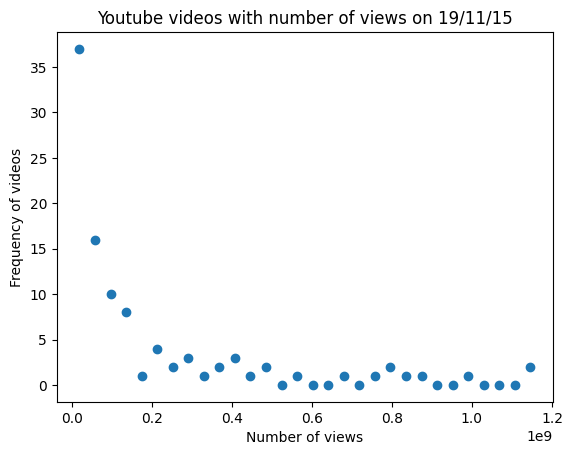

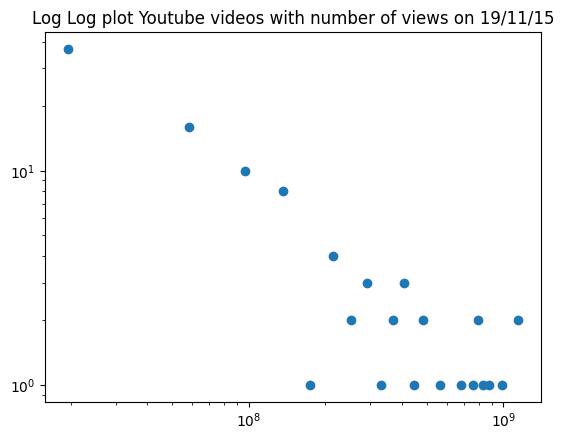

In [ ]:
def view_plots(default, *args):
  if default:
    total_views = [song['views'][10] for song in yt_songs.values()]
    day = yt_x[10]
  else:
    youtube_json = args[0]
    total_views = []
    for video in youtube_json:
      total_views.append(int(video['statistics']['viewCount']))
    day = datetime.today().strftime('%Y-%m-%d')
  y,binEdges=np.histogram(total_views,bins=30)
  bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
  plt.scatter(bincenters,y)
  plt.xlabel("Number of views")
  plt.ylabel("Frequency of videos")
  plt.title('Youtube videos with number of views on ' + day)
  save_graph('numviewsplot' + day.replace('/','-'))
  plt.show()

  plt.title('Log Log plot Youtube videos with number of views on ' + day)
  plt.scatter(bincenters,y)
  ax = plt.gca()
  ax.set_yscale('log')
  ax.set_xscale('log')
  save_graph('loglogplot' + day.replace('/','-'))
  plt.show()

#plt.hist([yt_songs[song]['views'][len(yt_songs[song]['views']) - 1] for song in yt_songs],bins=15, histtype = 'step')
view_plots(True)

#### Spotify vs Youtube

In [ ]:
sp = []
with open(f'{BASE_PATH}/spotify_top100/20151109_1328_data.json', "r") as file:
    data = json.load(file)['tracks']['items']
    for song in data:
      sp.append(song['track']['id'])

yt = []
with open(f'{BASE_PATH}/youtube_top100/20151109_1800_data.json', "r") as file:
    data = json.load(file)
    for song in data:
      yt.append(song['id'])

yt2sp = {}
sp2yt = {}
yt2order = {}
for i, (spi, yti) in enumerate(zip(sp, yt)):
  yt2sp[yti] = spi
  sp2yt[spi] = yti
  yt2order[yti] = i

In [ ]:
yt_songs, yt_x = likes_diff_from_dir('youtube_top100', x_labels=True, keyed='order')

files = os.listdir('/content/drive/MyDrive/WebScience/week3/youtube_top100')
files.sort(key=lambda val: int(val[:8]))

yt_orders = {}
for fi, filename in enumerate(files):
  with open(f'/content/drive/MyDrive/WebScience/week3/youtube_top100/{filename}', "r") as file:
    data = json.load(file)
    sorted_yt = sorted(data, key=lambda x: int(x['statistics']['viewCount']), reverse=True)
    for i, song in enumerate(sorted_yt):
      if fi == 0:
        yt_orders[song['id']] = []
      yt_orders[song['id']].append(i)

In [ ]:
print(yt_orders)

{'OPf0YbXqDm0': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'RgKAFK5djSk': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
spfiles = os.listdir(f'{BASE_PATH}/spotify_top100')
spfiles.remove('Unmatched to YouTube')
spfiles.sort(key=lambda val: int(val[:8]))

def check_spotify(yt_id):
  sp_orders = []
  for fi, filename in enumerate(spfiles):
    with open(f'{BASE_PATH}/spotify_top100/{filename}', "r") as file:
      data = json.load(file)['tracks']['items']
      for i, songdata in enumerate(data):
        song = songdata['track']
        if song['id'] == yt2sp[yt_id]:
          sp_orders.append(i)
          break
      else:
        sp_orders.append(np.nan)
  return sp_orders

In [ ]:
yt_id = 't2NgsJrrAyM'
yt_song_order = yt_orders[yt_id]
# for i in range(76):
#   yt_song_order.remove(57, np.nan)
#   yt_x.insert(57, np.nan)
# for i in range(3):
#   yt_song_order.insert(124, np.nan)
#   yt_x.insert(124, np.nan)
# for i in range(2):
#   yt_song_order.insert(192, np.nan)
#   yt_x.insert(192, np.nan)

sp_song_order = check_spotify(yt_id)
for i in range(76):
  sp_song_order.pop(57)
for i in range(3):
  sp_song_order.pop(124)
for i in range(2):
  sp_song_order.pop(192)

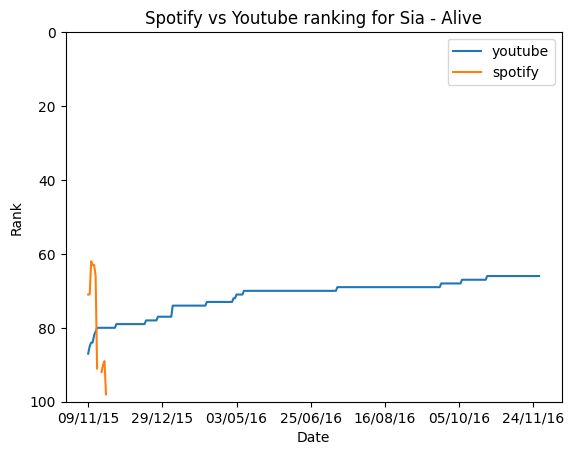

In [ ]:
plt.plot(yt_x, yt_song_order, label='youtube')
plt.plot(yt_x, sp_song_order, label='spotify')
plt.xticks(np.arange(0, len(yt_x), 50.0))
plt.ylim(100, 0)
plt.xlabel("Date")
plt.ylabel("Rank")
plt.title('Spotify vs Youtube ranking for ' + yt_songs[yt2order[yt_id]]['name'])
plt.legend()
save_graph('graphspvsyt' + yt_songs[yt2order[yt_id]]['name'])
plt.show()

## 5. Create Your Own Dataset

In [ ]:
def write_data_to_json(items):
  with open( BASE_PATH + "/youtube.json", "r") as reader:
    with open( BASE_PATH + "/youtube.json", "w" ) as writer:
      read = reader.read()
      try:
        data = json.load(reader)
        data["items"].extend(items)
        json.dump(data, writer)
      except:
        json.dump({'items' : items}, writer)


def youtube_get_data():
  youtube = build("youtube", "v3", developerKey="")
  nextPage = True
  nextPageToken = ''
  items = []
  while nextPage:
    print(items)
    if nextPageToken == '':
      search_response = youtube.videos().list(
          chart="mostPopular",
          part='id,statistics',
          videoCategoryId = 10,
          maxResults=50
        ).execute()
    else:
      search_response = youtube.videos().list(
          chart="mostPopular",
          part='id,statistics',
          videoCategoryId = 10,
          maxResults=50,
          pageToken=nextPageToken
          ).execute()
    newNextPageToken = search_response.get('nextPageToken')
    if newNextPageToken == nextPageToken:
      nextPage = False
    else:
      nextPageToken = newNextPageToken
    items.append(search_response.get('items', []))
  print("final: ")
  print(items)
  write_data_to_json(items)

youtube_get_data()

[]
[[{'kind': 'youtube#video', 'etag': 't-gZmrikz33EvbD_2BQNJ6hl5M0', 'id': 'jWdxXdp8sZI', 'statistics': {'viewCount': '1661015', 'likeCount': '39227', 'favoriteCount': '0', 'commentCount': '1269'}}, {'kind': 'youtube#video', 'etag': 'BwptMqyeYYSVJWsUxjLTft1N-V0', 'id': '3g5AbGTqvt0', 'statistics': {'viewCount': '583665', 'likeCount': '53811', 'favoriteCount': '0', 'commentCount': '3218'}}, {'kind': 'youtube#video', 'etag': 'zkAc66UMCU0i6RTZh0qjM-JrXL0', 'id': 'HfzbN5ky5Co', 'statistics': {'viewCount': '7183759', 'likeCount': '180967', 'favoriteCount': '0', 'commentCount': '7518'}}, {'kind': 'youtube#video', 'etag': '7slN1Kx2FqGL06p9Sj5y4Eimjv0', 'id': '6is3tHyn5ck', 'statistics': {'viewCount': '2215568', 'likeCount': '50499', 'favoriteCount': '0', 'commentCount': '4476'}}, {'kind': 'youtube#video', 'etag': 'fWLg22CefOlsAks_SeBnx8FiYdE', 'id': 'muzQ0r14L2Y', 'statistics': {'viewCount': '1013080', 'likeCount': '116312', 'favoriteCount': '0', 'commentCount': '8925'}}, {'kind': 'youtube#v

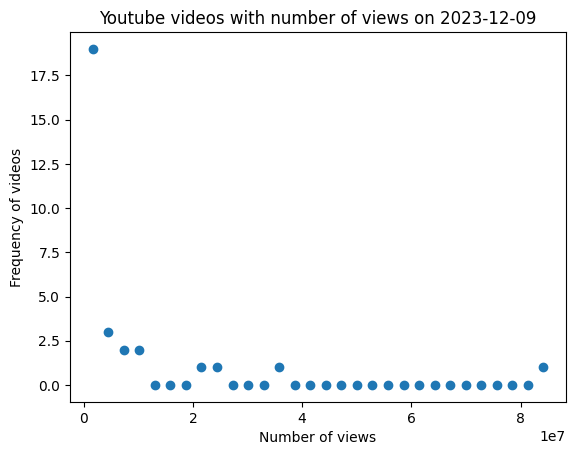

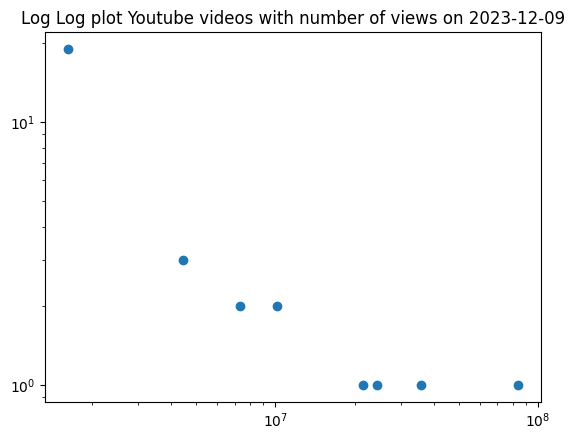

In [ ]:
def read_youtube_json():
  with open(BASE_PATH + "/youtube.json", "r") as jsonFile:
    data = json.load(jsonFile)['items'][0]
    view_plots(False, data)

read_youtube_json()